In [ ]:
import pandas as pd
import re
import string
#For plots
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_Sw(all_words, stops):
  sent = []
  for word in all_words: 
      if word not in stops:
          sent.append(word)
  return " ".join(sent)

## Turkish Stop words removal

In [ ]:
with open("/content/drive/MyDrive/tr_ds_ds.txt",'r') as f:
  txt = f.readlines()

In [ ]:
data = pd.DataFrame()
data['text'] = txt
data['text'] = data['text'].str.lower()
data

,text
0,zemfira musakızı aliyeva azerbaycanlı dilcibil...
1,hayatı. \n
2,"aliyeva zemfira musakızı, 1950 yılının 24 hazi..."
3,"ailelidir, 3 evladı vardır. \n"
4,"belarus, türkiyenin i̇stanbul şehrinde düzenle..."
...,...
3766412,"artvin kentine 89 km, şavşat kasabasına 24 km ..."
3766413,tarihçe. çoraklı köyünün eski adı kaynaklarda ...
3766414,adın kaynağı bilinmemektedir. \n
3766415,"garkilob, 1920lerde şavşat kazasında yer alan ..."


In [ ]:
from nltk.corpus import stopwords
turk_stops = set(stopwords.words('turkish'))
turk_stops

In [ ]:
# def removePunct(sent):
#   updt = sent.replace(':','').replace(';','').replace("'",'').replace('...','').replace('"','').replace('(','').replace(')','').replace('_','').replace('/','').replace('__','')
#   return updt

In [ ]:
stop_words = pd.read_csv("https://raw.githubusercontent.com/InJuxSanct/turkish-stopwords/master/src/lib/stopwords/raw-stopwords.txt", sep=" ", header=None)
stop_words.columns=["words_list"]
sw = stop_words['words_list'].to_list()
data["clean_txt"] = data["text"].apply(lambda x: remove_Sw(x.split(" "), sw))
data["clean_txt"] = data["clean_txt"].apply(lambda x: remove_Sw(x.split(" "), turk_stops))

In [ ]:
data.sample(5)

,text,clean_txt
3246070,nüfusu 30 eylül 2006 itibarıyla yaklaşık 15767...,nüfusu 30 eylül 2006 yaklaşık 15767 tespit edi...
3054885,transhümanizm teriminin ilk kullanılış tarihi ...,transhümanizm teriminin kullanılış tarihi 1957...
663454,"bu nedenle öğretimi okul ve günlük yaşam, ente...","öğretimi okul günlük yaşam, entelektüel özgürl..."
336172,benjamin ve carlito bir süre çekişti. \n,benjamin carlito süre çekişti. \n
1811598,bir yerine iki yıldızın yörüngesinde olduğu il...,yıldızın yörüngesinde onaylanan gezegendir. \n


In [ ]:
data.to_csv("/content/drive/MyDrive/tr_ds_ds.csv")

## Azerbaijan Stop words removal

In [ ]:
with open("/content/drive/MyDrive/aze_ds_ds.txt",'r') as f:
  txt = f.readlines()

In [ ]:
data = pd.DataFrame(txt, columns=['text'])
data['text'] = data['text'].str.lower()
data

In [ ]:
from nltk.corpus import stopwords
aze_stops = set(stopwords.words('azerbaijani'))

In [ ]:
data['clean_txt'] = data['text'].apply(lambda x: remove_Sw(x.split(" "), aze_stops))
data

,text,clean_txt
0,fenitləşmə qələvi süxurlar intruziyalarının ek...,fenitləşmə qələvi süxurlar intruziyalarının ek...
1,bəzən qələvi süxur massivlərin yerləşməsini tə...,qələvi süxur massivlərin yerləşməsini tənzim p...
2,"i̇lkin süxurların qələvi çöl şpatı, egirin və ...","i̇lkin süxurların qələvi çöl şpatı, egirin yax..."
3,hornblend və biotit egirinə keçir. \n,hornblend biotit egirinə keçir. \n
4,kaliumlu çöl şpatı bulanlıqlaşır. plagioklaz n...,kaliumlu çöl şpatı bulanlıqlaşır. plagioklaz n...
...,...,...
1876339,"beləcə, iki qaz ölkəsi narazılar ölkəsinə çevr...","beləcə, qaz ölkəsi narazılar ölkəsinə çevrildi..."
1876340,bu kəmər ölkənin şərq regionunun eloten və xəz...,kəmər ölkənin şərq regionunun eloten xəzər sah...
1876341,transxəzər qaz kəməri təbii qazın azərbaycan ə...,transxəzər qaz kəməri təbii qazın azərbaycan ə...
1876342,tengiz türkmənbaşı bakı tiflis ərzurum marşrut...,tengiz türkmənbaşı bakı tiflis ərzurum marşrut...


In [ ]:
data.to_csv("/content/drive/MyDrive/aze_ds_ds.csv")

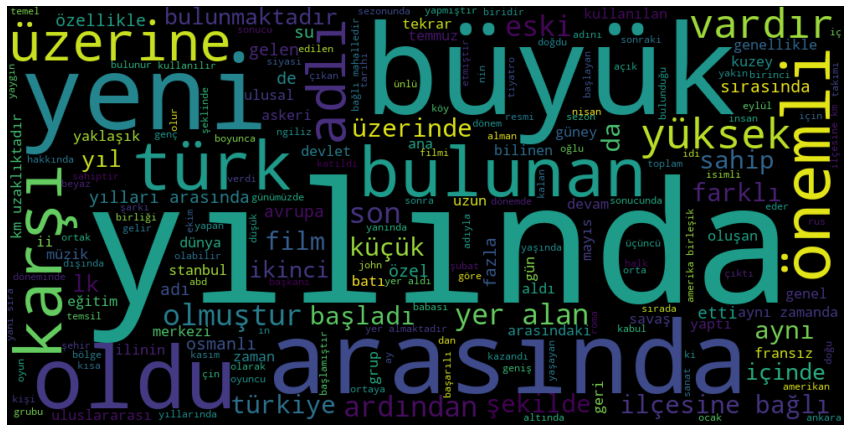

In [ ]:
wordcloud = WordCloud(width=1000, height=500).generate("+".join(data.sample(10000)["clean_txt"]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()